<a href="https://colab.research.google.com/github/tomiwagold/Customer-Reviews-Analysis-Unsupervised-ML/blob/main/Customer_Reviews_Unsupervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/customer_reviews_b10.csv')

In [ ]:
df.head()

,review_id,customer_id,product_id,review_text,rating,purchase_category,purchase_amount
0,R00001,C00001,P0001,"Shipping took too long, bad customer service.",1,Books,380.67
1,R00002,C00002,P0002,"Broke within a week, very disappointed.",1,Toys,268.58
2,R00003,C00003,P0003,"Average quality, nothing special.",3,Books,249.11
3,R00004,C00004,P0004,"Broke within a week, very disappointed.",2,Books,218.26
4,R00005,C00005,P0005,"Worst purchase ever, do not recommend.",2,Toys,283.41


In [ ]:
df.isnull().sum()

,0
review_id,0
customer_id,0
product_id,0
review_text,0
rating,0
purchase_category,0
purchase_amount,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   review_id          9000 non-null   object 
 1   customer_id        9000 non-null   object 
 2   product_id         9000 non-null   object 
 3   review_text        9000 non-null   object 
 4   rating             9000 non-null   int64  
 5   purchase_category  9000 non-null   object 
 6   purchase_amount    9000 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 492.3+ KB


In [ ]:
df.shape

(9000, 7)

In [ ]:
df.duplicated().sum()

0

# Cleaning the cutomer column review using the regular expressions and word lemmatizer

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
#Initializing Stop Words and Lemmatizer


stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [ ]:
# Define Function for Text Cleaning using Regular Expressions and WordNetLemmatizer

def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text.lower())  # Remove numbers and punctuations
    words = text.split()  # split words into separate units
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return " ".join(words)

df['cleaned_review'] = df['review_text'].apply(preprocess_text)

In [ ]:
df.head()

,review_id,customer_id,product_id,review_text,rating,purchase_category,purchase_amount,cleaned_review
0,R00001,C00001,P0001,"Shipping took too long, bad customer service.",1,Books,380.67,shipping took long bad customer service
1,R00002,C00002,P0002,"Broke within a week, very disappointed.",1,Toys,268.58,broke within week disappointed
2,R00003,C00003,P0003,"Average quality, nothing special.",3,Books,249.11,average quality nothing special
3,R00004,C00004,P0004,"Broke within a week, very disappointed.",2,Books,218.26,broke within week disappointed
4,R00005,C00005,P0005,"Worst purchase ever, do not recommend.",2,Toys,283.41,worst purchase ever recommend


<Axes: title={'center': 'Distribution of Customer Ratings'}, xlabel='rating'>

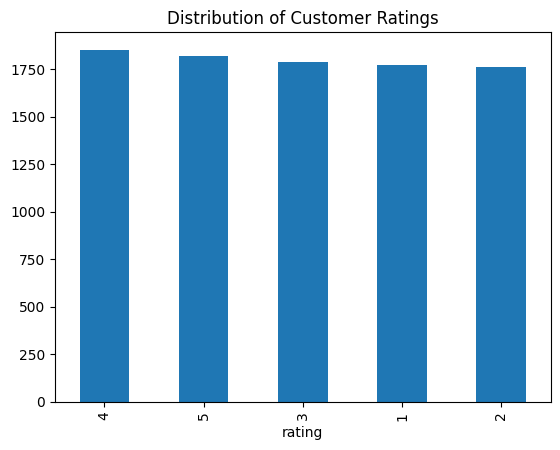

In [ ]:
df['rating'].value_counts().plot(kind='bar', title='Distribution of Customer Ratings')

In [ ]:
df['rating'].value_counts()

,count
rating,
4,1853
5,1823
3,1788
1,1775
2,1761


# Clustering with K_means

Concept: Clustering groups similar reviews together. w'll use TF-IDF(Term Frequency-Inverse Document Frequency)


# Vectorization

Vectorize the text means to convert the text or words into numbers
Vectorizing is used in NLP to map words or phrases from a dataset or coulmn to a corresponding vector or number which is then used to find word predictions or similarities

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Vectorize using TF-IDF
vectorizer = TfidfVectorizer(max_features = 9000)
x = vectorizer.fit_transform(df['cleaned_review'])

In [ ]:
# Apply K-Means clustering

kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(x)

# Preview Clusters
df[['cleaned_review', 'Cluster']].head(10)

,cleaned_review,Cluster
0,shipping took long bad customer service,2
1,broke within week disappointed,3
2,average quality nothing special,2
3,broke within week disappointed,3
4,worst purchase ever recommend,0
5,terrible experience never buying,1
6,worst purchase ever recommend,0
7,great product work perfectly,4
8,worth money poor quality,2
9,great product work perfectly,4


<Axes: title={'center': 'Distribution of Clusters'}, xlabel='Cluster'>

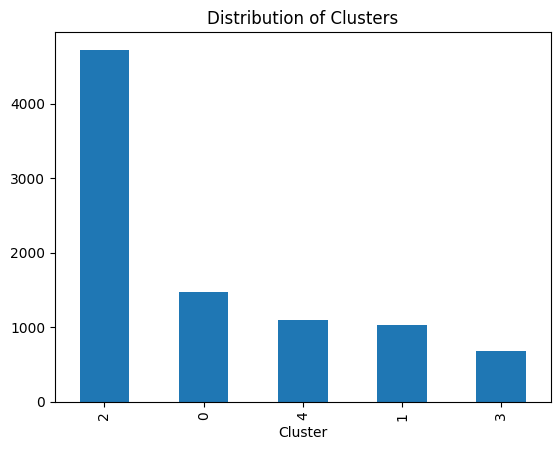

In [ ]:
# Visualize the Clusters

df['Cluster'].value_counts().plot(kind='bar',title='Distribution of Clusters')

# Sentiments Analysis - VADER

VADER - Valence Aware Dictionary and Sentiment Reasoner
Is a tool used basically to figure out if a piece of text is expressing positive, negative or neutral emotions

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# Initialize Sentiment Analyzer

sid = SentimentIntensityAnalyzer()

# Apply Sentiment Analysis
df['Sentiment_Score'] = df['cleaned_review'].apply(lambda x: sid.polarity_scores(x)['compound'])
df['Sentiment_Label'] = df['Sentiment_Score'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

In [ ]:
# Preview Sentiment Analysis

df[['cleaned_review', 'Sentiment_Score', 'Sentiment_Label']].head(30)

,cleaned_review,Sentiment_Score,Sentiment_Label
0,shipping took long bad customer service,-0.5423,Negative
1,broke within week disappointed,-0.7096,Negative
2,average quality nothing special,-0.3089,Negative
3,broke within week disappointed,-0.7096,Negative
4,worst purchase ever recommend,-0.3818,Negative
5,terrible experience never buying,-0.4767,Negative
6,worst purchase ever recommend,-0.3818,Negative
7,great product work perfectly,0.8519,Positive
8,worth money poor quality,-0.2960,Negative
9,great product work perfectly,0.8519,Positive


In [ ]:
df['Sentiment_Label'].value_counts()

,count
Sentiment_Label,
Negative,3896
Positive,3646
Neutral,1458


<Axes: title={'center': 'Distribution of Sentiments'}, xlabel='Sentiment_Label'>

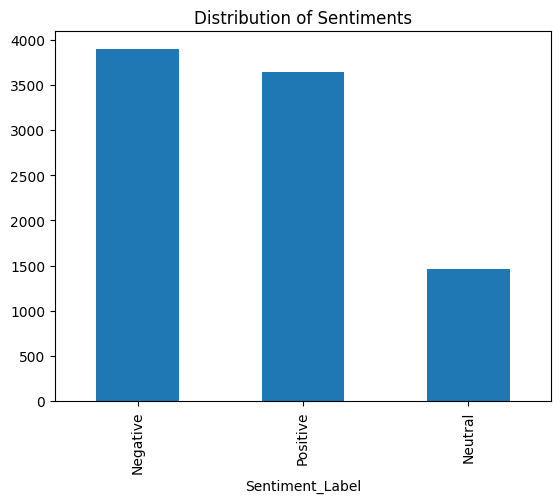

In [ ]:
df['Sentiment_Label'].value_counts().plot(kind='bar',title='Distribution of Sentiments')

In [ ]:
df['Sentiment_Label'].value_counts()

,count
Sentiment_Label,
Negative,3896
Positive,3646
Neutral,1458


# Sentiment Analysis Using TextBlob

In [ ]:
!pip install textblob

In [ ]:
from textblob import TextBlob

def get_textblob_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['textblob_sentiment'] = df['cleaned_review'].apply(get_textblob_sentiment)

In [ ]:
# Generate Sentiment Categories for both Vader and TextBlob

def categorize_sentiment(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df['vader_category'] = df['Sentiment_Score'].apply(categorize_sentiment)
df['textblob_category'] = df['textblob_sentiment'].apply(categorize_sentiment)

In [ ]:
print(df['vader_category'].value_counts())

vader_category
Negative    3896
Positive    3646
Neutral     1458
Name: count, dtype: int64


In [ ]:
print(df['textblob_category'].value_counts())

textblob_category
Positive    4012
Negative    2829
Neutral     2159
Name: count, dtype: int64


# Use Word Cloud to show the Frequency of texts in the Cleaned review Column

In [ ]:
!pip install wordcloud

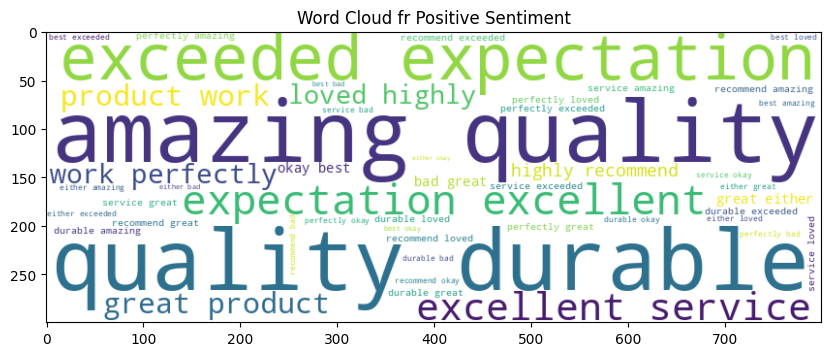

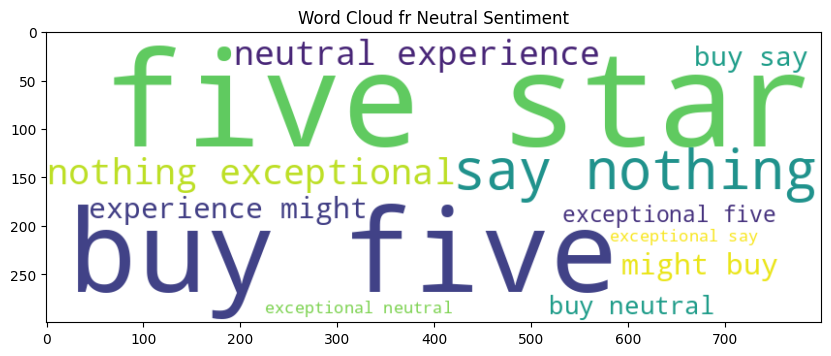

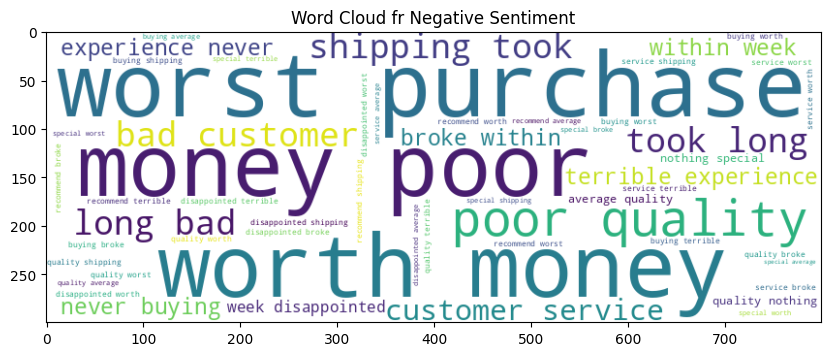

In [ ]:
from wordcloud import WordCloud

# Generate word clouds for each sentiment category
def generate_word_clouds(sentiment):
    text = " ".join(df[df['Sentiment_Label'] == sentiment]['cleaned_review'])
    wordcloud = WordCloud(width=800, height=300, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud fr {sentiment} Sentiment")
    plt.show()


# Generate word cloud for Positive, Negative and Neutral Sentiments
for sentiment in ['Positive', 'Neutral', 'Negative']:
    generate_word_clouds(sentiment)

In [ ]:
from sklearn.metrics import silhouette_score

score = silhouette_score(x, df['Cluster'])
print(f"Silhoutte Score: {score:.2f}")

Silhoutte Score: 0.38


In [ ]:
for k in range(2, 11):
    kmeans = KMeans(n_clusters= k, random_state= 42)
    labels = kmeans.fit_predict(x)
    score = silhouette_score(x, labels)
    print(f"K = {k}, Silhouette Score= {score:.2f}")


K = 2, Silhouette Score= 0.17
K = 3, Silhouette Score= 0.24
K = 4, Silhouette Score= 0.31
K = 5, Silhouette Score= 0.38
K = 6, Silhouette Score= 0.46
K = 7, Silhouette Score= 0.52
K = 8, Silhouette Score= 0.60
K = 9, Silhouette Score= 0.67
K = 10, Silhouette Score= 0.74


In [ ]:
kmeans = KMeans(n_clusters=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(x)

In [ ]:
# Preview clusters
df[['cleaned_review', 'Cluster']].head()

,cleaned_review,Cluster
0,shipping took long bad customer service,2
1,broke within week disappointed,6
2,average quality nothing special,7
3,broke within week disappointed,6
4,worst purchase ever recommend,0


In [ ]:
# Generate Sentiment Scores and Label

df['Sentiment_Score'] = df['cleaned_review'].apply(lambda x: sid.polarity_scores(x)['compound'])
df['Sentiment_Label'] = df['Sentiment_Score'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

In [ ]:
df[['cleaned_review', 'Sentiment_Score', 'Sentiment_Label']].head()

,cleaned_review,Sentiment_Score,Sentiment_Label
0,shipping took long bad customer service,-0.5423,Negative
1,broke within week disappointed,-0.7096,Negative
2,average quality nothing special,-0.3089,Negative
3,broke within week disappointed,-0.7096,Negative
4,worst purchase ever recommend,-0.3818,Negative


In [ ]:
df['Sentiment_Label'].value_counts()

,count
Sentiment_Label,
Negative,3896
Positive,3646
Neutral,1458


<Axes: title={'center': 'Distribution of Clusters'}, xlabel='Cluster'>

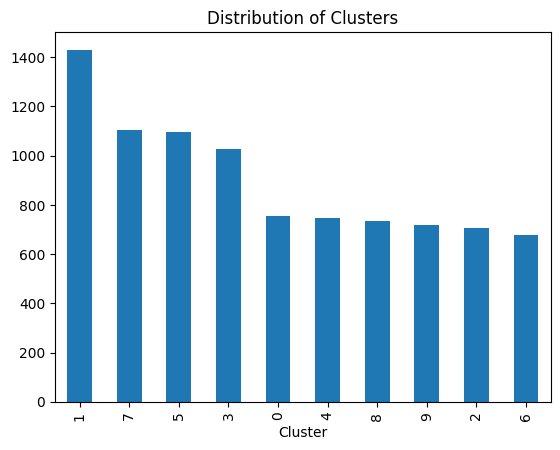

In [ ]:
# Visualization of clusters

df['Cluster'].value_counts().plot(kind='bar',title='Distribution of Clusters')


<Axes: title={'center': 'Distribution of Sentiments'}, xlabel='Sentiment_Label'>

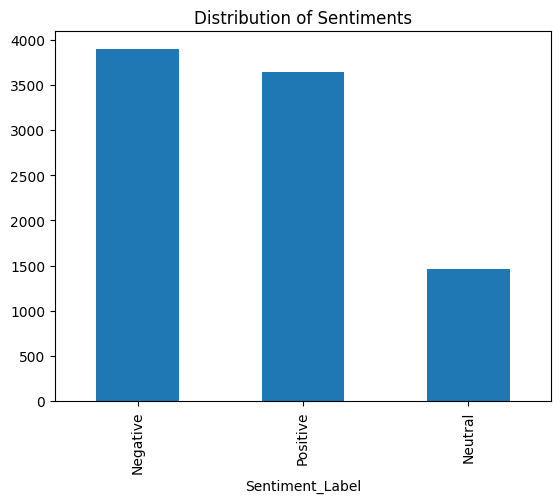

In [ ]:
df['Sentiment_Label'].value_counts().plot(kind='bar',title='Distribution of Sentiments')